In [2]:
!pip install qiskit[visualization]
!pip install qiskit-aer

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 162.6/162.6 kB 3.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 119.4/119.4 kB 9.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 33.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.5/49.5 kB 3.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.7/49.7 MB 18.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.8/4.8 MB 87.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 108.5/108.5 kB 7.7 MB/s eta 0:00:00
  Created wheel for pylatexenc: filename=pylatexenc-2.10-py3-none-any.whl size=136816 sha256=7664dee8abdd590e84c0cc50a0e6880f000d041514618b24a36ec548a8f45170
  Stored in directory: /root/.cache/pip/wheels/d3/31/8b/e09b0386afd80cfc556c00408c9aeea5c35c4d484a9c762fd5
Successfully built pylatexenc
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.3/12.3 MB 77.5 MB/s eta 0:00:00


In [3]:
import numpy as np
import matplotlib as mpl
from qiskit import *
from qiskit.quantum_info import Operator, Statevector
from qiskit.visualization import array_to_latex, plot_histogram, plot_bloch_multivector,plot_state_qsphere
from qiskit_aer import Aer
from qiskit.visualization import plot_histogram
from qiskit.providers.basic_provider import BasicProvider
from IPython.display import Image
from qiskit import assemble
from qiskit.visualization import plot_state_qsphere

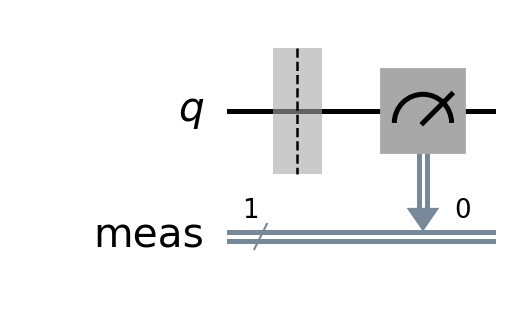

In [22]:
#Question 1

import qiskit
from qiskit import QuantumCircuit, QuantumRegister
from qiskit.visualization import plot_bloch_multivector
from qiskit.quantum_info import Statevector
import matplotlib.pyplot as plt



qubits = QuantumRegister(1, name="q")
circuit = QuantumCircuit(qubits)

state = [1/2**0.5, 1j/2**0.5]  # Normalized superposition state vector +i

qc = QuantumCircuit(1)
qc.initialize(state, 0)


sv = Statevector.from_instruction(qc)
fig, (ax1) = plt.subplots(1, 1)
plot_bloch_multivector(sv)
circuit.measure_all()
circuit.draw(output='mpl', ax=ax1)






The above code draws the qubit by using the plot_bloch_multivector function. It is initialized with a qubit state of ny normalizing whichi is down with the help of state function

In [5]:
#Question 2
from qiskit.transpiler.preset_passmanagers import generate_preset_pass_manager
from qiskit_ibm_runtime import QiskitRuntimeService, SamplerV2 as Sampler
from qiskit.visualization import plot_histogram
from qiskit.primitives import PrimitiveResult

qubits = QuantumRegister(3, name="q")
circuit = QuantumCircuit (qubits)
q0,q1, q2 = qubits
circuit.h(q0)
circuit.sx(q1)
circuit.ccx(q0,q1, q2)
circuit.measure_all()
circuit.draw("mpl")

service = QiskitRuntimeService()
backend = service.least_busy(operational=True, simulator=False, min_num_qubits=127)
pass_manager = generate_preset_pass_manager(optimization_level=3, backend=backend)
isa_circuit = pass_manager. run(circuit)
isa_circuit.draw("mpl", idle_wires=False)
sampler = Sampler (backend)
job = sampler. run ([isa_circuit])
job_id = job.job_id()
print(job_id)


ModuleNotFoundError: No module named 'qiskit_ibm_runtime'

In [6]:
job_id = 'cwz86x35v39g008j60yg'
service = QiskitRuntimeService()
job = service.job(job_id)
result = job.result()


NameError: name 'QiskitRuntimeService' is not defined

In [7]:

pub_result = result[0]
counts=pub_result.data.meas.get_counts()
plot_histogram(counts)
total_shots = sum(counts.values())
one_count = counts['111']
probability_of_1 = one_count / total_shots
print(f"Probability of measuring |1>: {probability_of_1}")

NameError: name 'result' is not defined

Till this part of the code, the circuit is first created according to requirement, and then transpiled and using pass manager, the circuit is run in a real quantum device. The result is plotted in a histogram, which represents the probability of each state after measurement.

In below code we find the unitary matrix to do the operation of the above circuit and apply it again on the circuit.

In [8]:
from qiskit.quantum_info import Operator

circuit = QuantumCircuit(3)

circuit.h(0)
circuit.sx(1)
circuit.ccx(0, 1, 2)
unitary_matrix = Operator(circuit).data
print(unitary_matrix)
circuit.unitary(unitary_matrix, [0,1,2])


[[ 0.35355339+0.35355339j  0.35355339+0.35355339j  0.35355339-0.35355339j
   0.35355339-0.35355339j  0.        +0.j          0.        +0.j
   0.        +0.j          0.        +0.j        ]
 [ 0.35355339+0.35355339j -0.35355339-0.35355339j  0.35355339-0.35355339j
  -0.35355339+0.35355339j  0.        +0.j          0.        +0.j
   0.        +0.j          0.        +0.j        ]
 [ 0.35355339-0.35355339j  0.35355339-0.35355339j  0.35355339+0.35355339j
   0.35355339+0.35355339j  0.        +0.j          0.        +0.j
   0.        +0.j          0.        +0.j        ]
 [ 0.        +0.j          0.        +0.j          0.        +0.j
   0.        +0.j          0.35355339-0.35355339j -0.35355339+0.35355339j
   0.35355339+0.35355339j -0.35355339-0.35355339j]
 [ 0.        +0.j          0.        +0.j          0.        +0.j
   0.        +0.j          0.35355339+0.35355339j  0.35355339+0.35355339j
   0.35355339-0.35355339j  0.35355339-0.35355339j]
 [ 0.        +0.j          0.        +0.j    

In [9]:
circuit.draw()

┌───┐      ┌──────────┐
q_0: ┤ H ├───■──┤0         ├
     ├───┴┐  │  │          │
q_1: ┤ √X ├──■──┤1 Unitary ├
     └────┘┌─┴─┐│          │
q_2: ──────┤ X ├┤2         ├
           └───┘└──────────┘

In below code, we change basis with Y using paulis Y gate.

In [10]:
import numpy as np
from qiskit_aer import AerSimulator

#to change y-basis use pauli y gate (0 -j;j 0)
pauli_y_gate = np.array([[0, -1j],
                           [1j, 0]])
circuit.unitary(pauli_y_gate, [0,1,2], label='pauli_y_gate')
circuit.measure_all()
circuit.draw()

simulator = AerSimulator()

result = simulator.run(circuit, shots=4096).result()

counts = result.get_counts()

print("Measurement outcomes:", counts)
total_shots = sum(counts.values())
ones = counts['111']
probability_of_1 = ones / total_shots
print(f"Probability of measuring |1>: {probability_of_1}")

Measurement outcomes: {'100': 254, '110': 234, '011': 249, '111': 265, '001': 246, '000': 273, '010': 262, '101': 2313}
Probability of measuring |1>: 0.064697265625


In [11]:
circuit.draw()

┌───┐      ┌──────────┐┌──────────────┐ ░ ┌─┐      
   q_0: ┤ H ├───■──┤0         ├┤ pauli_y_gate ├─░─┤M├──────
        ├───┴┐  │  │          │├──────────────┤ ░ └╥┘┌─┐   
   q_1: ┤ √X ├──■──┤1 Unitary ├┤ pauli_y_gate ├─░──╫─┤M├───
        └────┘┌─┴─┐│          │├──────────────┤ ░  ║ └╥┘┌─┐
   q_2: ──────┤ X ├┤2         ├┤ pauli_y_gate ├─░──╫──╫─┤M├
              └───┘└──────────┘└──────────────┘ ░  ║  ║ └╥┘
meas: 3/═══════════════════════════════════════════╩══╩══╩═
                                                   0  1  2

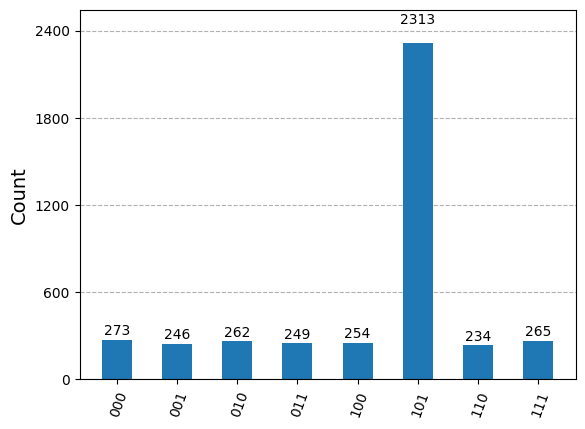

In [12]:
plot_histogram(counts)

Change between first circuit and y basis changed is significant. Probability of 101 is highest and |1> has decreased to 0.05, previously 010 was highest, now 101.Which suggests applying the matrix again and applying paulis y-gate has flipped states of each qubit.

**#Question 3**

Below we find the unitary matrix for z measurement, for problem 2 circuit. As y has been calculated in the previous problem, we can skip it.

In [26]:


# Define a quantum register with three qubits
qreg = QuantumRegister(3, name="qubit")
qcircuit = QuantumCircuit(qreg)

# Assign individual qubits to variables
q0, q1, q2 = qreg

# Apply quantum gates to the circuit
qcircuit.h(q0)  # Hadamard gate on the first qubit
qcircuit.sx(q1)  # Sqrt(X) gate on the second qubit
qcircuit.ccx(q0, q1, q2)  # Controlled-Controlled-X (Toffoli) gate

# Define the Pauli-Z matrix as a unitary
pauli_z_matrix = np.array([[1, 0],
                           [0, -1]])

# Add the unitary gate to the circuit
qcircuit.unitary(pauli_z_matrix, [q0, q1, q2], label="Z Gate")

# Add measurements to all qubits
qcircuit.measure_all()

# Set up the quantum simulator
sim = AerSimulator()

# Execute the circuit on the simulator
sim_result = sim.run(qcircuit, shots=4096).result()

# Get the measurement outcomes
output_counts = sim_result.get_counts()

# Display the circuit diagram
qcircuit.draw()


┌───┐      ┌────────┐ ░ ┌─┐      
qubit_0: ┤ H ├───■──┤ Z Gate ├─░─┤M├──────
         ├───┴┐  │  ├────────┤ ░ └╥┘┌─┐   
qubit_1: ┤ √X ├──■──┤ Z Gate ├─░──╫─┤M├───
         └────┘┌─┴─┐├────────┤ ░  ║ └╥┘┌─┐
qubit_2: ──────┤ X ├┤ Z Gate ├─░──╫──╫─┤M├
               └───┘└────────┘ ░  ║  ║ └╥┘
 meas: 3/═════════════════════════╩══╩══╩═
                                  0  1  2

Measurement results: {'010': 990, '000': 1051, '111': 1010, '001': 1045}
Probability of measuring state |111⟩: 0.2466


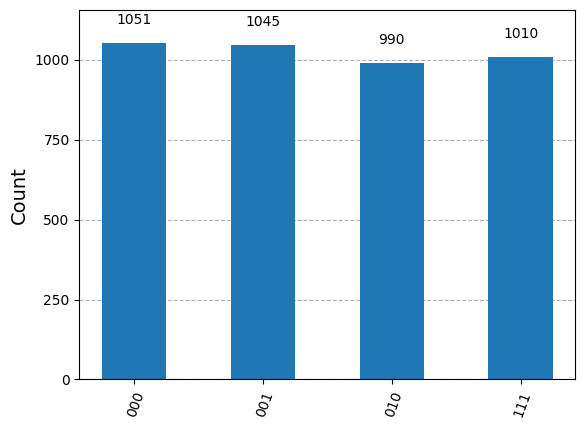

In [27]:
from qiskit.visualization import plot_histogram

# Display the measurement results
print("Measurement results:", output_counts)

# Calculate total shots
total_counts = sum(output_counts.values())

# Extract the count for the state |111⟩
count_111 = output_counts.get('111', 0)  # Use `.get()` to avoid key errors

# Calculate the probability of measuring |111⟩
probability_111 = count_111 / total_counts
print(f"Probability of measuring state |111⟩: {probability_111:.4f}")

# Plot the histogram of measurement outcomes
plot_histogram(output_counts)


After applying z-gate, it has been evenly distributed, with a slight difference.

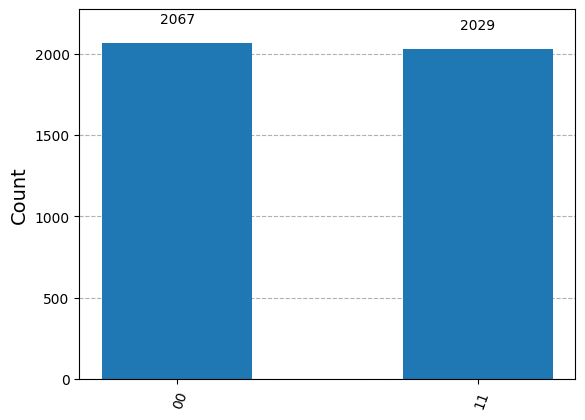

In [28]:
#Question 4

qc = QuantumCircuit(2, 2)

# Apply a Hadamard gate on the first qubit
qc.h(0)

# Apply a CNOT gate with the first qubit as control and the second as target
qc.cx(0, 1)

# Add measurement operations
qc.measure([0, 1], [0, 1])

# Initialize the quantum simulator
sim = AerSimulator()

# Execute the circuit on the simulator with specified shots
sim_result = sim.run(qc, shots=4096).result()

measurement_results = sim_result.get_counts()
plot_histogram(measurement_results)

In [29]:
qc.draw()

┌───┐     ┌─┐   
q_0: ┤ H ├──■──┤M├───
     └───┘┌─┴─┐└╥┘┌─┐
q_1: ─────┤ X ├─╫─┤M├
          └───┘ ║ └╥┘
c: 2/═══════════╩══╩═
                0  1

In [17]:
from qiskit import ClassicalRegister

qreg = QuantumRegister(2, 'q')
creg = ClassicalRegister(2, 'c')
circ = QuantumCircuit(qreg, creg)

circ.h(qreg[0])
circ.cx(qreg[0], qreg[1])
circ.measure(qreg, creg)

service = QiskitRuntimeService()
backend = service.least_busy(operational=True, simulator=False, min_num_qubits=127)
pass_manager = generate_preset_pass_manager(optimization_level=2, backend=backend)
isa_circuit = pass_manager.run(circ)
circ.measure([0, 1], [0, 1])
isa_circuit.draw("mpl", idle_wires=False)
sampler = Sampler (backend)
job = sampler. run ([isa_circuit])
job_id = job.job_id()
print(job_id)


NameError: name 'QiskitRuntimeService' is not defined

In [18]:
job_id = 'cwz70pjtdtng0087vfjg'
job = service.job(job_id)
result = job.result()
print(result)


NameError: name 'service' is not defined

In [19]:
bit_array = result[0].data.c
counts = bit_array.get_counts()

plot_histogram(counts)

TypeError: 'Result' object is not subscriptable

First we created the circuit according to the question and ran first in simulator and then in real quantum device. For simulator, only 00 and 11 state is possible while for real quantum due to noise at 01 and 10 values were observed as well. For simulator both states are equally probable, while for real quantum 00 state is less probable.

In [31]:
## Question 5


# Define the simulator
sim = AerSimulator()

# Function to generate a quantum circuit for a specified basis
def generate_circuit(basis_type):
    qc = QuantumCircuit(1, 1)
    qc.h(0)
    qc.sdg(0)
    if basis_type == 'X':
        qc.h(0)  # Apply an additional Hadamard gate for X-basis
    qc.measure(0, 0)
    return qc

# Initialize results dictionary
measurement_results = {}

# Create and simulate circuits for each basis
for basis_type in ['X', 'Y', 'Z']:
    basis_circuit = generate_circuit(basis_type)
    simulation_result = sim.run(basis_circuit, shots=4096).result()
    measurement_results[basis_type] = simulation_result.get_counts()

# Plot histograms for each basis
for basis_type, result_counts in measurement_results.items():
    plot_histogram(result_counts, title=f"Measurements in {basis_type} Basis").show()



In [32]:


# Define a function to construct the error correction circuit
def build_error_correction_circuit():
    circuit = QuantumCircuit(3, 1)
    circuit.cx(0, 1)
    circuit.cx(0, 2)
    circuit.x(1)  # Simulating an error
    circuit.cx(0, 1)
    circuit.cx(0, 2)
    circuit.ccx(1, 2, 0)
    circuit.measure(0, 0)
    return circuit

# Create the error correction circuit
correction_circuit = build_error_correction_circuit()

# Initialize the quantum simulator
sim = AerSimulator()

# Execute the circuit
simulation_result = sim.run(correction_circuit, shots=4096).result()

# Get the measurement results
corrected_counts = simulation_result.get_counts()

# Display results and plot the histogram
print("Corrected Measurement Results:", corrected_counts)
plot_histogram(corrected_counts, title="Error-Corrected Results").show()


Corrected Measurement Results: {'0': 4096}


In the 3-qubit repetition code, the logical qubit's state |𝜓>=|𝛼>0
> +β|1> is encoded into an entangled state 𝛼|000> + β|111>  using CNOT gates. A bit-flip error X gate is applied to simulate noise, flipping the state of a qubit. Decoding involves checking parity with CNOT gates and using a Toffoli (CCX) gate for majority voting, ensuring the logical qubit reflects the majority state of the physical qubits. Finally, the logical qubit is measured, yielding the corrected result.